In [1]:
from rdkit import Chem, rdBase
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import rdScaffoldNetwork
from rdkit.Chem import Descriptors
import matplotlib as mpl
from rdkit import Chem
from rdkit.Chem import rdFMCS

print('RDKit version: ',rdBase.rdkitVersion)
print('MatplotLib version:', mpl.__version__)

RDKit version:  2023.09.3
MatplotLib version: 3.8.2


### Define input molecules

In [2]:
# flucloxacillin
flu = Chem.MolFromSmiles('Cc1onc(-c2c(F)cccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')
# ampicillin
amp = Chem.MolFromSmiles('CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=O)N2[C@H]1C(=O)O')
# penicillin
pen = Chem.MolFromSmiles('CC1(C)SC2C(NC(=O)Cc3ccccc3)C(=O)N2C1C(=O)O.[Na]')
# oxacillin
ox = Chem.MolFromSmiles('Cc1onc(-c2ccccc2)c1C(=O)N[C@@H]1C(=O)N2[C@@H](C(=O)O)C(C)(C)S[C@H]12')

In [3]:
# Define scaffold parameter network
params = rdScaffoldNetwork.ScaffoldNetworkParams()

In [4]:
# customize parameter attributes
params.includeScaffoldsWithoutAttachments=False

### Create scaffold network for flucloxacillin

[12:25:30] Running LargestFragmentChooser
[12:25:30] Fragment: Cc1onc(-c2c(F)cccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H]1SC(C)(C)[C@@H]2C(=O)O
[12:25:30] New largest fragment: Cc1onc(-c2c(F)cccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H]1SC(C)(C)[C@@H]2C(=O)O (47)


There are 13 molecules in the list.
Cc1onc(-c2c(F)cccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H]1SC(C)(C)[C@@H]2C(=O)O
O=C(NC1C(=O)N2CCSC12)c1conc1-c1ccccc1
*=*1*2****2*1**(=*)*1:*:*:*:*:1*1:*:*:*:*:*:1
*c1nocc1C(=O)NC1C(=O)N2CCSC12
**1:*:*:*:*:1*(=*)**1*2****2*1=*
*c1ccccc1
**1:*:*:*:*:*:1
*c1conc1-c1ccccc1
**1:*:*:*:*:1*1:*:*:*:*:*:1
*C1C(=O)N2CCSC12
**1*2****2*1=*
*c1conc1*
**1:*:*:*:*:1*


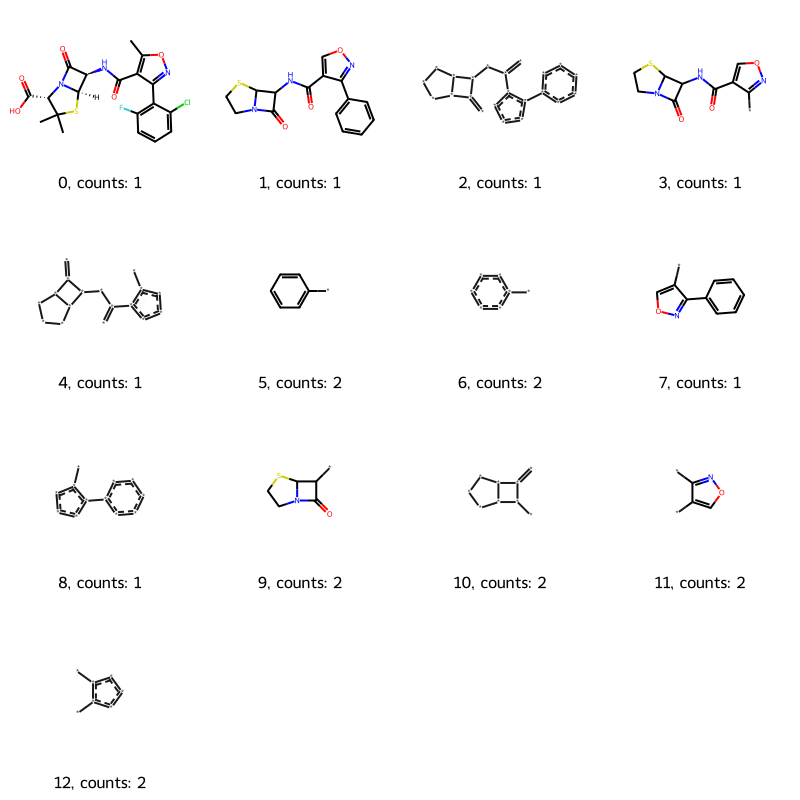

In [5]:
net = rdScaffoldNetwork.CreateScaffoldNetwork([flu],params)

nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]

# View the SMILES in the network list
print("There are", len(nodemols), "molecules in the list.")
for i in nodemols:
    print(Chem.MolToSmiles(i))

Draw.MolsToGridImage(nodemols,legends=['{0}, counts: {1}'.format(i,c) for i,c in enumerate(net.counts)],molsPerRow=4)


### Remove molecules without attachment points

*c1conc1*
*c1ccccc1


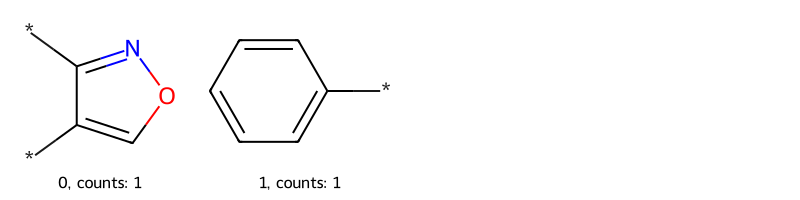

In [8]:
def filter_mol(list_of_molecules):
    """Filter the molecule scaffold network list to 
    filter out scaffolds without attachment points 
    and molecular weight less than 60 or greater than 100"""
    filtered_list = []
    for mol in list_of_molecules:
        # Check for the presence of attachment points and molecular weight range
        if "*" in Chem.MolToSmiles(mol) and 60 < Descriptors.MolWt(mol) < 100:
            filtered_list.append(mol)
    
    # Sort the filtered list based on the number of heteroatoms (fewer carbons)
    filtered_list.sort(key=lambda x: x.GetNumHeavyAtoms())

    return filtered_list

# Apply the filter and view the molecules in the filtered list
filtered_molecules = filter_mol(nodemols)
for mol in filtered_molecules:
    print(Chem.MolToSmiles(mol))
Draw.MolsToGridImage(filtered_molecules,legends=['{0}, counts: {1}'.format(i,c) for i,c in enumerate(net.counts)],molsPerRow=4)


### Calculate molecular weights

In [12]:
# def calculate_molecular_weights(smiles_list):
#     molecular_weights = []
#     for mol in smiles_list:
#         if mol is not None:
#             weight = Descriptors.MolWt(mol)
#             molecular_weights.append(weight)
#         else:
#             # Handle invalid SMILES or conversion issues
#             molecular_weights.append(None)

#     return molecular_weights


# weights = calculate_molecular_weights(nodemols)
# for smiles, weight in zip(nodemols, weights):
#     print(f"Molecular Weight for {Chem.MolToSmiles(smiles)}: {weight} g/mol")


Molecular Weight for *=*1*2****2*1**(=*)*1:*:*:*:*:1*1:*:*:*:*:*:1: 0.0 g/mol
Molecular Weight for *c1nocc1C(=O)NC1C(=O)N2CCSC12: 238.248 g/mol
Molecular Weight for **1:*:*:*:*:1*(=*)**1*2****2*1=*: 0.0 g/mol
Molecular Weight for *c1ccccc1: 77.106 g/mol
Molecular Weight for **1:*:*:*:*:*:1: 0.0 g/mol
Molecular Weight for *c1conc1-c1ccccc1: 144.153 g/mol
Molecular Weight for **1:*:*:*:*:1*1:*:*:*:*:*:1: 0.0 g/mol
Molecular Weight for *C1C(=O)N2CCSC12: 128.17600000000002 g/mol
Molecular Weight for **1*2****2*1=*: 0.0 g/mol
Molecular Weight for *c1conc1*: 67.047 g/mol
Molecular Weight for **1:*:*:*:*:1*: 0.0 g/mol


### Create scaffold network for ampicillin

There are 7 molecules in the list.
CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=O)N2[C@H]1C(=O)O
O=C(Cc1ccccc1)NC1C(=O)N2CCSC12
*=*(**1*2****2*1=*)**1:*:*:*:*:*:1
*C1C(=O)N2CCSC12
**1*2****2*1=*
*c1ccccc1
**1:*:*:*:*:*:1


[12:38:33] Running LargestFragmentChooser
[12:38:33] Fragment: CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=O)N2[C@H]1C(=O)O
[12:38:33] New largest fragment: CC1(C)S[C@@H]2[C@H](NC(=O)[C@H](N)c3ccccc3)C(=O)N2[C@H]1C(=O)O (43)


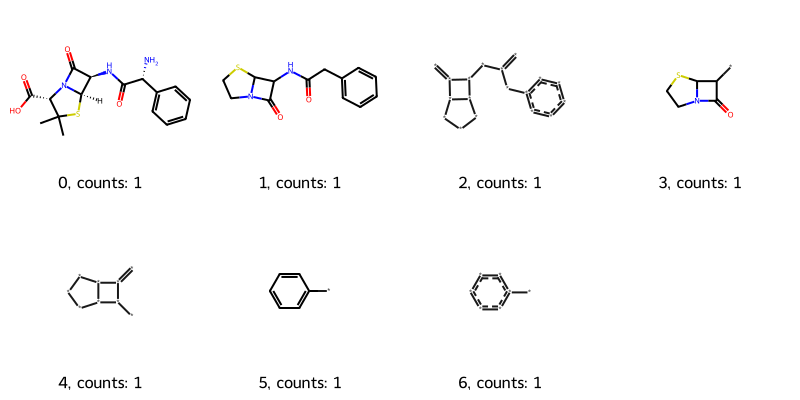

In [11]:
net = rdScaffoldNetwork.CreateScaffoldNetwork([amp],params)

nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]

# View the SMILES in the network list
print("There are", len(nodemols), "molecules in the list.")
for i in nodemols:
    print(Chem.MolToSmiles(i))
    
Draw.MolsToGridImage(nodemols,legends=['{0}, counts: {1}'.format(i,c) for i,c in enumerate(net.counts)],molsPerRow=4)


*c1ccccc1


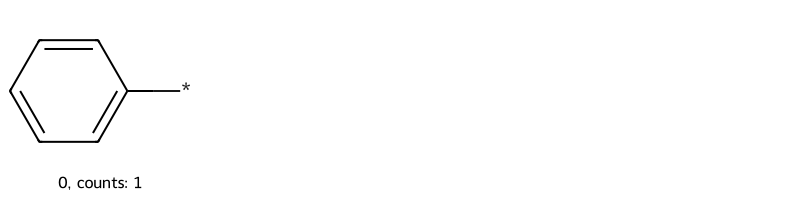

In [12]:
# View moleules in filtered_list
nodemols = filter_mol(nodemols)
for i in nodemols:
        print(Chem.MolToSmiles(i))

Draw.MolsToGridImage(nodemols,legends=['{0}, counts: {1}'.format(i,c) for i,c in enumerate(net.counts)],molsPerRow=4)

### Use our input examples

[12:39:25] Running LargestFragmentChooser
[12:39:25] Fragment: Fc1ccc(CCOc2cncc3nnc(-c4ccc(-c5ccc(Cl)c(OC6CC6)c5)c(OC5CC5)c4)n23)cc1F
[12:39:25] New largest fragment: Fc1ccc(CCOc2cncc3nnc(-c4ccc(-c5ccc(Cl)c(OC6CC6)c5)c(OC5CC5)c4)n23)cc1F (66)


There are 49 molecules in the list.
Fc1ccc(CCOc2cncc3nnc(-c4ccc(-c5ccc(Cl)c(OC6CC6)c5)c(OC5CC5)c4)n23)cc1F
c1ccc(CCOc2cncc3nnc(-c4ccc(-c5cccc(OC6CC6)c5)c(OC5CC5)c4)n23)cc1
*(**1:*:*:*:*:*:1)**1:*:*:*:*2:*:*:*(*3:*:*:*(*4:*:*:*:*(**5**5):*:4):*(**4**4):*:3):*:1:2
*c1ccccc1
**1:*:*:*:*:*:1
*c1cncc2nnc(-c3ccc(-c4cccc(OC5CC5)c4)c(OC4CC4)c3)n12
**1:*:*:*:*2:*:*:*(*3:*:*:*(*4:*:*:*:*(**5**5):*:4):*(**4**4):*:3):*:1:2
*c1nnc2cncc(OCCc3ccccc3)n12
**1:*:*:*2:*:*:*:*(****3:*:*:*:*:*:3):*:1:2
*c1ccc(-c2cccc(OC3CC3)c2)c(OC2CC2)c1
**1:*:*:*(*2:*:*:*:*(**3**3):*:2):*(**2**2):*:1
*c1ccc(-c2nnc3cncc(OCCc4ccccc4)n23)cc1OC1CC1
**1:*:*:*(*2:*:*:*3:*:*:*:*(****4:*:*:*:*:*:4):*:2:3):*:*:1**1**1
*c1cc(-c2nnc3cncc(OCCc4ccccc4)n23)ccc1-c1cccc(OC2CC2)c1
**1:*:*(*2:*:*:*3:*:*:*:*(****4:*:*:*:*:*:4):*:2:3):*:*:*:1*1:*:*:*:*(**2**2):*:1
*C1CC1
**1**1
*c1cccc(OC2CC2)c1
**1:*:*:*:*(**2**2):*:1
*c1cccc(-c2ccc(-c3nnc4cncc(OCCc5ccccc5)n34)cc2OC2CC2)c1
**1:*:*:*:*(*2:*:*:*(*3:*:*:*4:*:*:*:*(****5:*:*:*:*:*:5):*:3:4):*:

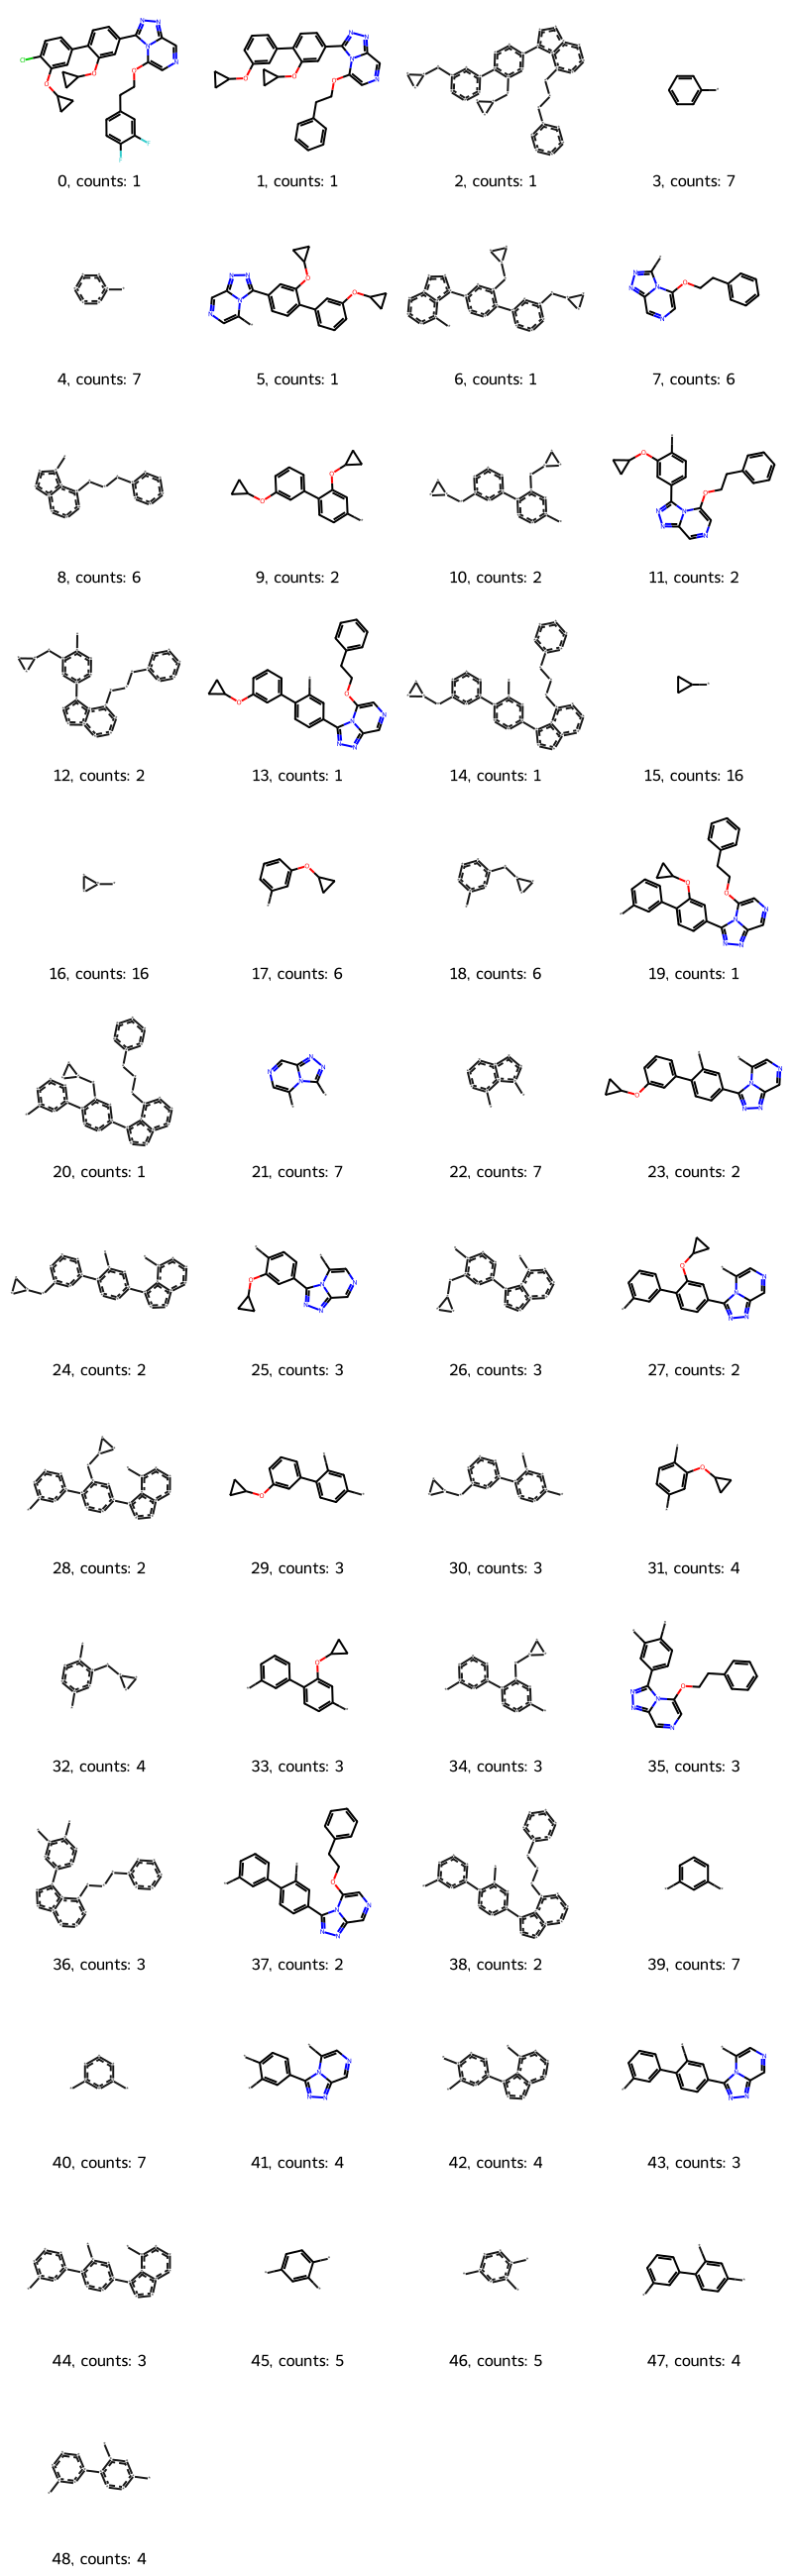

In [13]:
mol =  "FC1=CC=C(CCOC2=CN=CC3=NN=C(N23)C2=CC=C(C(OC3CC3)=C2)C2=CC(OC3CC3)=C(Cl)C=C2)C=C1F"

net = rdScaffoldNetwork.CreateScaffoldNetwork([Chem.MolFromSmiles(mol)],params)

nodemols = [Chem.MolFromSmiles(x) for x in net.nodes]

# View the SMILES in the network list
print("There are", len(nodemols), "molecules in the list.")
for i in nodemols:
    print(Chem.MolToSmiles(i))
    
Draw.MolsToGridImage(nodemols,legends=['{0}, counts: {1}'.format(i,c) for i,c in enumerate(net.counts)],molsPerRow=4)


*c1ccccc1
*c1cccc(*)c1
*c1ccc(*)c(*)c1


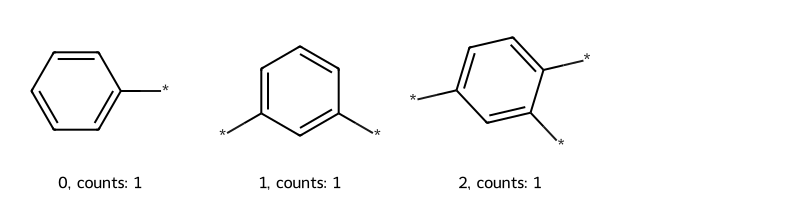

In [14]:
# View moleules in filtered_list
nodemols = filter_mol(nodemols)
for i in nodemols:
        print(Chem.MolToSmiles(i))

Draw.MolsToGridImage(nodemols,legends=['{0}, counts: {1}'.format(i,c) for i,c in enumerate(net.counts)],molsPerRow=4)